**Выполнил**: Решетников Егор Алексеевич (ПМ-41) (reshetnikov.e.a@mail.ru)

**Преподаватель**: Гурьянов М.А., кафедра ВМ-1


Весенний семестр, 2022 год

МИЭТ, Зеленоград

# Глава 4. Аукцион и моделирование аукциона. Аукцион первой цены, аукцион второй цены

## Теоретические сведения
Виды аукционов: 
* **Открытый аукцион** (все игроки слышат, что предложил другой игрок) - торговля на рынке ценных бумаг
* **Закрытый аукцион** (все игроки пишут предложения на бумажке) - например тендеры и госзакупки, сбор КП у коммерческих предприятий

Голландский аукцион (открытый аукцион со снижением цены)
Английский аукцион (классический с повышением цены)


#### Проблемы аукциона
* Проблема участвовать или нет (например, покупать ли ценные бумаги)
* Проблема определить правильную цену (например, почем продать прототип твердотельного лидара Самсунгу)
* Проблема борьбы с конкурентами (как убедиться что никто не повлияет на аукцион в злом умысле)

### Примеры

**Проблема борьбы с конкурентами**

Правила аукциона, Эксперимент Базермана

У эксперимента простые правила:
* Профессор проводит аукцион, на котором продаёт банкноту в 20 долларов.

* Начальная стоимость банкноты — 1 доллар.

* Участники по классическим правилам любого аукциона называют свои ставки. Шаг ставок — 1 доллар. Ставки можно поднимать сколь угодно долго. Банкнота достанется тому, кто сделал самую большую, никем не перебитую ставку. Победитель выплачивает профессору сумму своей ставки.

* Важное условие: участник, который оказался вторым, — последним предлагал свою ставку перед итоговым победителем, — должен выплатить профессору сумму своей итоговой ставки.



![title](./img.assets/7534cd77b61f5890d9537999902eb537.png)

**Проблема участия**
Если существует тендер, то с одной стороны стоит участвовать чтобы "попытать удачу", с другой стороны если за вход есть плата, то мат.ожидание выигрыша может быть меньше нуля

**Проблема определения правильной цены**

Каждый игрок делает предположение о цене неизвестного ему товара. В глубине души игрок уже определил для себя его цену.
Можно сказать что цена игрока = цена предмета + ошибка.
Можно так же сказать, что по ЦПТ эта ошибка распредела нормально.
Тогда можно ожидать, что аукцион выиграет тот, у кого ошибка ушла максимально вправо. Грубо говоря в любом аукционе тот кто выиграл - проиграл в цене и переплатил. Чтобы этого избежать был придуман аукцион второй цены - аукцион Викри.

In [1]:
import numpy as np


class Auction:
    def __init__(self,cost = 1000,start = 0, step = 10):
        self.cost = cost
        self.start = start
        self.step = step
        self.round = 1
        self.current_price = self.start
        self.bets = []
        self.is_ended = False

    def bet(self,name):
        self.bets.append(name)

    def end_round(self):
        print("Ending round",self.round)
        print(" Bet: ", self.current_price, "Participants: ", len(self.bets))
        if len(self.bets) == 1:
            print("We have a winner! Congratulations,",self.bets[0])
            print("You bought an Item that costs ", self.cost)
            print("for ", self.current_price)
            self.is_ended = True
        if len(self.bets) < 1:
            print('noone is participating **sadface**')
            self.is_ended = True
        self.current_price += self.step
        self.round += 1
        self.bets = []
    
    def get_participants_count(self):
        return len(self.bets)



class Agent:
    def __init__(self,
            name,
            type = 'rational',
            value = 100,
            uncertanty_percent = 30,
            learning_speed = 5):
        self.name = name
        self.type = type
        self.value = value
        self.initial_value = value
        self.uncertanty_percent = uncertanty_percent
        self.learning_speed = learning_speed
        

    def make_assumption(self):
        if self.type == 'rational':
            standart_deviation = self.value * self.uncertanty_percent / 100
            self.value = self.initial_value + np.random.normal(
                0,
                standart_deviation)
            if self.uncertanty_percent > self.learning_speed:
                self.uncertanty_percent -= self.learning_speed
            

    def make_bet(self,auction:Auction):
        if self.value > auction.current_price or (self.type == 'aggressive' and auction.get_participants_count() == 1):
            auction.bet(self.name)



english_auction = Auction(1200,0,100)
max = Agent('Max','rational',1000)
steeve = Agent('Steeve','rational',600)
agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 1200)

while english_auction.is_ended == False:
    max.make_assumption()
    max.make_bet(english_auction)
    steeve.make_assumption()
    steeve.make_bet(english_auction)
    agressive_oleg.make_assumption()
    agressive_oleg.make_bet(english_auction)
    english_auction.end_round()


Ending round 1
 Bet:  0 Participants:  3
Ending round 2
 Bet:  100 Participants:  3
Ending round 3
 Bet:  200 Participants:  3
Ending round 4
 Bet:  300 Participants:  3
Ending round 5
 Bet:  400 Participants:  3
Ending round 6
 Bet:  500 Participants:  3
Ending round 7
 Bet:  600 Participants:  3
Ending round 8
 Bet:  700 Participants:  2
Ending round 9
 Bet:  800 Participants:  2
Ending round 10
 Bet:  900 Participants:  2
Ending round 11
 Bet:  1000 Participants:  2
Ending round 12
 Bet:  1100 Participants:  1
We have a winner! Congratulations, Aggressive Oleg
You bought an Item that costs  1200
for  1100


### Задание 1

На базе приведенного выше примера добавить третьего участника, который имеет отличающийся тип игрока. Например

* Осторожный - Совершает ставку только если внутренняя его цена ниже чем текущая цена и в аукционе в предыдущем раунде было как минимум два игрока кроме него
* Агрессивный - Всегда совершает ставку если остался в аукционе 1х1
* Иррациональный - перед началом аукциона решает случайным образом, нужна ему эта вещь или нет. Участвует до тех пор пока у него хватает денег (надо ввести новую переменную)
* Кооперативный - Выбирает еще одного игрока в свою кооперацию и 
* Шпион - в качестве своей оценки стоимости товара выбирает среднюю между всеми оценками и настоящей ценой товара
* Спекулянт - Всегда играет до тех пор пока текущая ставка меньше реальной цены продукта

Добавим агрессивного игрока

In [2]:
import numpy as np


class Auction:
    def __init__(self,cost = 1000,start = 0, step = 10):
        self.cost = cost
        self.start = start
        self.step = step
        self.round = 1
        self.current_price = self.start
        self.bets = []
        self.is_ended = False

    def bet(self,name):
        self.bets.append(name)

    def end_round(self):
        print("Ending round",self.round)
        print(" Bet: ", self.current_price, "Participants: ", len(self.bets))
        if len(self.bets) == 1:
            print("We have a winner! Congratulations,",self.bets[0])
            print("You bought an Item that costs ", self.cost)
            print("for ", self.current_price)
            self.is_ended = True
        if len(self.bets) < 1:
            print('noone is participating **sadface**')
            self.is_ended = True
        self.current_price += self.step
        self.round += 1
        self.bets = []
    
    def get_participants_count(self):
        return len(self.bets)



class Agent:
    def __init__(self,
            name,
            type = 'rational',
            value = 100,
            uncertanty_percent = 30,
            learning_speed = 5):
        self.name = name
        self.type = type
        self.value = value
        self.initial_value = value
        self.uncertanty_percent = uncertanty_percent
        self.learning_speed = learning_speed
        

    def make_assumption(self):
        if self.type == 'rational':
            standart_deviation = self.value * self.uncertanty_percent / 100
            self.value = self.initial_value + np.random.normal(
                0,
                standart_deviation)
            if self.uncertanty_percent > self.learning_speed:
                self.uncertanty_percent -= self.learning_speed
            

    def make_bet(self,auction:Auction):
        if self.value > auction.current_price or (self.type == 'aggressive' and auction.get_participants_count() == 1):
            auction.bet(self.name)



english_auction = Auction(1200,0,100)
max = Agent('Max','rational',1000)
steeve = Agent('Steeve','rational',600)
agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 1200)

while english_auction.is_ended == False:
    max.make_assumption()
    max.make_bet(english_auction)
    steeve.make_assumption()
    steeve.make_bet(english_auction)
    agressive_oleg.make_assumption()
    agressive_oleg.make_bet(english_auction)
    english_auction.end_round()


Ending round 1
 Bet:  0 Participants:  3
Ending round 2
 Bet:  100 Participants:  3
Ending round 3
 Bet:  200 Participants:  3
Ending round 4
 Bet:  300 Participants:  3
Ending round 5
 Bet:  400 Participants:  3
Ending round 6
 Bet:  500 Participants:  3
Ending round 7
 Bet:  600 Participants:  3
Ending round 8
 Bet:  700 Participants:  2
Ending round 9
 Bet:  800 Participants:  2
Ending round 10
 Bet:  900 Participants:  2
Ending round 11
 Bet:  1000 Participants:  1
We have a winner! Congratulations, Aggressive Oleg
You bought an Item that costs  1200
for  1000


Видим, что оставшись один на один с другим участником, Олег торгуется до победного.

### Задание 2

На базе приведенного выше кода реализовать голландский аукцион с теми же игроками. 

**Голландский аукцион** — аукцион, в ходе которого вначале объявляется самая высокая цена на продаваемый товар, а затем ставки снижаются до той, на которую согласится первый покупатель, которому и продается товар.

In [3]:
import numpy as np


class Auction:
    def __init__(self,cost = 1000,start = 0, step = -10):
        self.cost = cost
        self.start = start
        self.step = step
        self.round = 1
        self.current_price = self.start
        self.bets = []
        self.is_ended = False

    def bet(self,name):
        self.bets.append(name)

    def end_round(self):
        print("Ending round",self.round)
        print(" Bet: ", self.current_price, "Participants: ", len(self.bets))
        if len(self.bets) == 1:
            print("We have a winner! Congratulations,",self.bets[0])
            print("You bought an Item that costs ", self.cost)
            print("for ", self.current_price)
            self.is_ended = True
        if len(self.bets) > 1:
            print('noone is winner **sadface**')
            self.is_ended = True
        self.current_price += self.step
        self.round += 1
        self.bets = []
    
    def get_participants_count(self):
        return len(self.bets)



class Agent:
    def __init__(self,
            name,
            type = 'rational',
            value = 100,
            uncertanty_percent = 30,
            learning_speed = 5):
        self.name = name
        self.type = type
        self.value = value
        self.initial_value = value
        self.uncertanty_percent = uncertanty_percent
        self.learning_speed = learning_speed
        

    def make_assumption(self):
        if self.type == 'rational':
            standart_deviation = self.value * self.uncertanty_percent / 100
            self.value = self.initial_value + np.random.normal(
                0,
                standart_deviation)
            if self.uncertanty_percent > self.learning_speed:
                self.uncertanty_percent -= self.learning_speed
            

    def make_bet(self,auction:Auction):
        if self.value > auction.current_price or (self.type == 'aggressive' and auction.get_participants_count() == 1):
            auction.bet(self.name)

english_auction = Auction(1500,2000,-100)
max = Agent('Max','rational',1000)
steeve = Agent('Steeve','rational',600)
agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 1200)

while english_auction.is_ended == False:
    max.make_assumption()
    max.make_bet(english_auction)
    steeve.make_assumption()
    steeve.make_bet(english_auction)
    agressive_oleg.make_assumption()
    agressive_oleg.make_bet(english_auction)
    english_auction.end_round()


Ending round 1
 Bet:  2000 Participants:  0
Ending round 2
 Bet:  1900 Participants:  0
Ending round 3
 Bet:  1800 Participants:  0
Ending round 4
 Bet:  1700 Participants:  0
Ending round 5
 Bet:  1600 Participants:  0
Ending round 6
 Bet:  1500 Participants:  0
Ending round 7
 Bet:  1400 Participants:  0
Ending round 8
 Bet:  1300 Participants:  0
Ending round 9
 Bet:  1200 Participants:  0
Ending round 10
 Bet:  1100 Participants:  1
We have a winner! Congratulations, Aggressive Oleg
You bought an Item that costs  1500
for  1100


### Задание 3

Реализовать аукцион Викри. Повторить его 100 раз и повторить английский аукцион 100 раз. Для каждого случая вычислить и нарисовать гистограмму распределения переплаты или недоплаты победителя

**Аукцион Викри** — это алгоритм проведения однораундного закрытого аукциона, при котором право на покупку получает участник, предложивший максимальную ставку, но покупка осуществляется по второй максимальной ставке

Добавим метод для получения сдвига реальной цены и цены, которую выплатит игрок. Если она больше нуля, то выражает недоплату, иначе - переплату.

Проведем один пробный аукцион Викри, чтобы убедиться в правильности работы метода:

In [4]:
class Auction:
    def __init__(self,cost = 1000,start = 0, step = -10, type = 'english'):
        self.cost = cost
        self.start = start
        self.step = step
        self.round = 1
        self.current_price = self.start
        self.type = type
        self.bets = []
        self.is_ended = False
        self.prevous_round_bet = 0

    def bet(self,name):
        self.bets.append(name)

    def end_round(self):
        print("Ending round",self.round)
        print(" Bet: ", self.current_price, "Participants: ", len(self.bets))
        if len(self.bets) == 1:
            print("We have a winner! Congratulations,",self.bets[0])
            print("You bought an Item that costs ", self.cost)
            
            if self.type == 'Vickrey' and self.prevous_round_bet != 0:
                self.current_price = self.prevous_round_bet

            print("for ", self.current_price)
            self.is_ended = True
            return
        if len(self.bets) < 1 and self.type == 'english':
            print('noone is winner **sadface**')
            self.is_ended = True
        if len(self.bets) == 0 and self.type == 'Vickrey':
            print('noone is winner **sadface**')
            self.is_ended = True
        self.prevous_round_bet = self.current_price
        self.current_price += self.step
        self.round += 1
        self.bets = []
    
    def get_participants_count(self):
        return len(self.bets)
    
    def get_price_shift(self):
        return self.cost - self.current_price

class Agent:
    def __init__(self,
            name,
            type = 'rational',
            value = 100,
            uncertanty_percent = 30,
            learning_speed = 5):
        self.name = name
        self.type = type
        self.value = value
        self.initial_value = value
        self.uncertanty_percent = uncertanty_percent
        self.learning_speed = learning_speed
        

    def make_assumption(self):
        if self.type == 'rational':
            standart_deviation = self.value * self.uncertanty_percent / 100
            
            if (standart_deviation < 0):
                return
            self.value = self.initial_value + np.random.normal(
                0,
                standart_deviation)
            if self.uncertanty_percent > self.learning_speed:
                self.uncertanty_percent -= self.learning_speed
            

    def make_bet(self,auction:Auction):
        if self.value > auction.current_price or (self.type == 'aggressive'
                                                  and (auction.get_participants_count() <= 1 and auction.type=='english')):
            auction.bet(self.name)


In [5]:
vickrey_auction = Auction(1500,0,100, type='Vickrey')
max = Agent('Max','rational',1000)
steeve = Agent('Steeve','rational',600)
agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 1200)

vickrey_price_shfits = []

while vickrey_auction.is_ended == False:
    max.make_assumption()
    max.make_bet(vickrey_auction)
    steeve.make_assumption()
    steeve.make_bet(vickrey_auction)
    agressive_oleg.make_assumption()
    agressive_oleg.make_bet(vickrey_auction)
    vickrey_auction.end_round()
    
print("Price shift: {0}".format(vickrey_auction.get_price_shift()))

Ending round 1
 Bet:  0 Participants:  3
Ending round 2
 Bet:  100 Participants:  3
Ending round 3
 Bet:  200 Participants:  3
Ending round 4
 Bet:  300 Participants:  3
Ending round 5
 Bet:  400 Participants:  3
Ending round 6
 Bet:  500 Participants:  3
Ending round 7
 Bet:  600 Participants:  2
Ending round 8
 Bet:  700 Participants:  2
Ending round 9
 Bet:  800 Participants:  2
Ending round 10
 Bet:  900 Participants:  2
Ending round 11
 Bet:  1000 Participants:  1
We have a winner! Congratulations, Aggressive Oleg
You bought an Item that costs  1500
for  900
Price shift: 600


Видно, что Олег купил лот, цена которого 1500 за 900. В результате его "сдвиг цены" оказался равен 600. Метод работает верно.

Закомментируем выводы, так как аукционы будем проводить несколько раз.

In [6]:
class Auction:
    def __init__(self,cost = 1000,start = 0, step = -10, type = 'english'):
        self.cost = cost
        self.start = start
        self.step = step
        self.round = 1
        self.current_price = self.start
        self.type = type
        self.bets = []
        self.is_ended = False
        self.prevous_round_bet = 0

    def bet(self,name):
        self.bets.append(name)

    def end_round(self):
#         print("Ending round",self.round)
#         print(" Bet: ", self.current_price, "Participants: ", len(self.bets))
        if len(self.bets) == 1:
#             print("We have a winner! Congratulations,",self.bets[0])
#             print("You bought an Item that costs ", self.cost)
            
            if self.type == 'Vickrey' and self.prevous_round_bet != 0:
                self.current_price = self.prevous_round_bet

#             print("for ", self.current_price)
            self.is_ended = True
            return
        if len(self.bets) < 1:
#             print('noone is winner **sadface**')
            self.is_ended = True
        self.prevous_round_bet = self.current_price
        self.current_price += self.step
        self.round += 1
        self.bets = []
    
    def get_participants_count(self):
        return len(self.bets)
    
    def get_price_shift(self):
        return self.cost - self.current_price

Проведем 100 раз каждый английский аукцион и аукцион Викри. В каждой итерации будем случайным образом отклонять параметры аукциона и участников.

In [7]:
import random as rnd
rnd.seed(42)

# Аукцион Викри
vickrey_price_shfits = []

for i in range(100):
    vickrey_auction = Auction(800 + rnd.randint(0, 500), 0, 100, type='Vickrey')
    max = Agent('Max','rational',900 + rnd.randint(0, 200))
    steeve = Agent('Steeve','rational', 900 + rnd.randint(0, 400))
    agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 900 + rnd.randint(0, 200))

    while vickrey_auction.is_ended == False:
        max.make_assumption()
        max.make_bet(vickrey_auction)
        steeve.make_assumption()
        steeve.make_bet(vickrey_auction)
        agressive_oleg.make_assumption()
        agressive_oleg.make_bet(vickrey_auction)
        vickrey_auction.end_round()

    vickrey_price_shfits.append(vickrey_auction.get_price_shift())
    
vickrey_price_shfits = np.array(vickrey_price_shfits)

# Английский аукцион
english_price_shfits = []

for i in range(100):
    english_auction = Auction(800 + rnd.randint(0, 500), 0, 100, type='english')
    max = Agent('Max','rational', 900 + rnd.randint(0, 200))
    steeve = Agent('Steeve','rational', 900 + rnd.randint(0, 400))
    agressive_oleg = Agent('Aggressive Oleg', 'aggressive', 900 + rnd.randint(0, 200))

    while english_auction.is_ended == False:
        max.make_assumption()
        max.make_bet(english_auction)
        steeve.make_assumption()
        steeve.make_bet(english_auction)
        agressive_oleg.make_assumption()
        agressive_oleg.make_bet(english_auction)
        english_auction.end_round()

    english_price_shfits.append(english_auction.get_price_shift())

english_price_shfits = np.array(english_price_shfits)

Сформиурем результаты, выделив разделив массивы на два: массив переплат и недоплат.

In [8]:
# Переплаты в английском аукционе
english_over_price = np.abs(english_price_shfits[english_price_shfits < 0])

# Недоплаты в английском аукционе
english_befor_price = english_price_shfits[english_price_shfits > 0]

# Переплаты в аукционе Викри
vickrey_over_price = np.abs(vickrey_price_shfits[vickrey_price_shfits < 0])

# Недоплаты в аукционе Викри
vickrey_before_price = vickrey_price_shfits[vickrey_price_shfits > 0]

Построим гистограммы переплат и недоплат.

In [9]:
from matplotlib import pyplot as plt

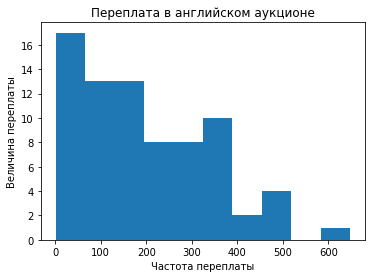

In [10]:
plt.hist(english_over_price)
plt.xlabel('Частота переплаты')
plt.ylabel('Величина переплаты')
plt.title(r'Переплата в английском аукционе')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

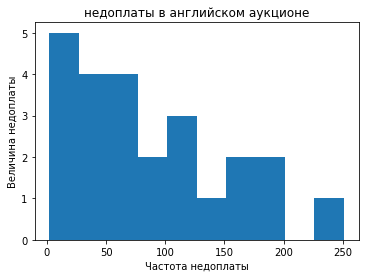

In [11]:
plt.hist(english_befor_price)
plt.xlabel('Частота недоплаты')
plt.ylabel('Величина недоплаты')
plt.title('недоплаты в английском аукционе')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

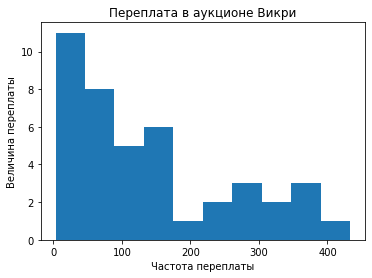

In [12]:
plt.hist(vickrey_over_price)
plt.xlabel('Частота переплаты')
plt.ylabel('Величина переплаты')
plt.title('Переплата в аукционе Викри')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

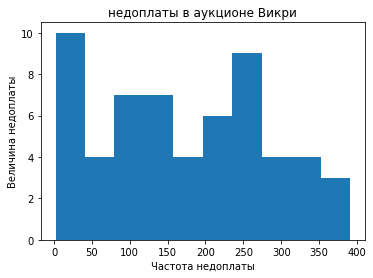

In [13]:
plt.hist(vickrey_before_price)
plt.xlabel('Частота недоплаты')
plt.ylabel('Величина недоплаты')
plt.title('недоплаты в аукционе Викри')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

Видим, что в аукционе Викри мат ожидание переплат меньше, чем в английском аукционе. Что соответствует основной идеи аукциона Викри